In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
landscape_cat = {
    "ag": [
        "Corn",
        "Cotton",
        "Rice",
        "Sorghum",
        "Soybeans",
        "Sunflower",
        "Peanuts",
        "Tobacco",
        "Sweet Corn",
        "Pop or Orn Corn",
        "Mint",
        "Barley",
        "Durum Wheat",
        "Spring Wheat",
        "Winter Wheat",
        "Other Small Grains",
        "Dbl Crop WinWht/Soybeans",
        "Rye",
        "Oats",
        "Millet",
        "Speltz",
        "Canola",
        "Flaxseed",
        "Safflower",
        "Rape Seed",
        "Mustard",
        "Alfalfa",
        "Other Hay/Non Alflafa",
        "Camelina",
        "Buckwheat",
        "Sugarbeets",
        "Dry Beans",
        "Potatoes",
        "Other Crops",
        "Sugarcane",
        "Sweet Potatoes",
        "Misc Vegs & Fruits",
        "Watermelons",
        "Onions",
        "Cucumbers",
        "Chick Peas",
        "Lentils",
        "Peas",
        "Tomatoes",
        "Caneberries",
        "Hops",
        "Herbs",
        "Clover/Wildflowers",
        "Sod/Grass Seed",
        "Switchgrass",
        "Cherries",
        "Peaches",
        "Apples",
        "Grapes",
        "Christmas Trees",
        "Other Tree Crops",
        "Citrus",
        "Pecans",
        "Almonds",
        "Walnuts",
        "Pears",
        "Pistachios",
        "Triticale",
        "Carrots",
        "Asparagus",
        "Garlic",
        "Cantaloupes",
        "Prunes",
        "Olives",
        "Oranges",
        "Honeydew Melons",
        "Broccoli",
        "Avocados",
        "Peppers",
        "Pomegranates",
        "Nectarines",
        "Greens",
        "Plums",
        "Strawberries",
        "Squash",
        "Apricots",
        "Vetch",
        "Dbl Crop WinWht/Corn",
        "Dbl Crop Oats/Corn",
        "Lettuce",
        "Dbl Crop Triticale/Corn",
        "Pumpkins",
        "Dbl Crop Lettuce/Durum Wht",
        "Dbl Crop Lettuce/Cantaloupe",
        "Dbl Crop Lettuce/Cotton",
        "Dbl Crop Lettuce/Barley",
        "Dbl  Crop Durum Wht/Sorghum",
        "Dbl Crop Barley/Sorghum",
        "Dbl Crop WinWht/Sorghum",
        "Dbl Crop Barley/Corn",
        "Dbl Crop WinWht/Cotton",
        "Dbl Crop Soybeans/Cotton",
        "Dbl Crop Soybeans/Oats",
        "Dbl Crop Corn/Soybeans",
        "Blueberries",
        "Cabbage",
        "Cauliflower",
        "Celery",
        "Radishes",
        "Turnips",
        "Eggplants",
        "Gourds",
        "Cranberries",
        "Dbl Crop Barley/Soybeans",
        "Cropland",
    ],
    "nat": [
        "Forest",
        "Shrubland",
        "Barren",
        "Wetlands",
        "Nonag/Undefined",
        "Deciduous Forest",
        "Evergreen Forest",
        "Mixed Forest",
        "Shrubland",
        "Woody Wetlands",
        "Herbaceous Wetlands",
    ],
    "semi_nat": ["Grassland/Pasture"],
    "dev": [
        "Developed/Open Space",
        "Developed/Low Intensity",
        "Developed/Med Intensity",
        "Developed/High Intensity",
        "Barren",
    ],
    "other": [
        "Aquaculture",
        "Water",
        "Perennial Ice/Snow",
    ],
}


In [4]:
def cdl_processing(cdl_metadata, qgis_csv):
    cdl_metadata["cdl_number"] = "VALUE_" + cdl_metadata["cdl_number"].astype("str")
    qgis_csv.rename(
        columns=cdl_metadata.set_index("cdl_number")["cdl_classification"], inplace=True
    )
    qgis_csv = qgis_csv.drop(
        [
            "descriptio",
            "timestamp",
            "begin",
            "end",
            "altitudeMo",
            "tessellate",
            "extrude",
            "visibility",
            "drawOrder",
            "icon",
        ],
        axis=1,
    )
    qgis_csv["Total"] = qgis_csv.sum(axis=1, numeric_only=True)
    qgis_csv['Ag'] = qgis_csv[qgis_csv.columns.intersection(landscape_cat['ag'])].sum(axis=1)
    qgis_csv['Ag_Prop'] = qgis_csv['Ag'] / qgis_csv['Total']
    qgis_csv['Nat'] = qgis_csv[qgis_csv.columns.intersection(landscape_cat['nat'])].sum(axis=1)
    qgis_csv['Nat_Prop'] = qgis_csv['Nat'] / qgis_csv['Total']
    qgis_csv['Semi_Nat'] = qgis_csv[qgis_csv.columns.intersection(landscape_cat['semi_nat'])].sum(axis=1)
    qgis_csv['Semi_Nat_Prop'] = qgis_csv['Semi_Nat'] / qgis_csv['Total']
    qgis_csv['Dev'] = qgis_csv[qgis_csv.columns.intersection(landscape_cat['dev'])].sum(axis=1)
    qgis_csv['Dev_Prop'] = qgis_csv['Dev'] / qgis_csv['Total']
    qgis_csv['Other'] = qgis_csv[qgis_csv.columns.intersection(landscape_cat['other'])].sum(axis=1)
    qgis_csv['Other_Prop'] = qgis_csv['Other'] / qgis_csv['Total']

    return qgis_csv


In [5]:
metadata = pd.read_csv("../CDL_Metadata_NY_2022.csv")
qgis_df_1km = pd.read_csv(
    "2023_1km_cdl_output.csv"
)

In [6]:
cdl_1km = cdl_processing(metadata, qgis_df_1km)
cdl_1km

,Name,Corn,Sorghum,Soybeans,Sweet Corn,Barley,Spring Wheat,Winter Wheat,Rye,Oats,...,Ag,Ag_Prop,Nat,Nat_Prop,Semi_Nat,Semi_Nat_Prop,Dev,Dev_Prop,Other,Other_Prop
0,HAT,161,1,422,8,0,0,47,0,1,...,779,0.224885,1757,0.507217,583,0.168303,355,0.102483,0.0,0.0
1,MUS,684,0,1029,1,2,0,142,1,2,...,2632,0.759815,404,0.116628,237,0.068418,174,0.050231,0.0,0.0
2,REM,372,8,570,15,1,0,121,1,123,...,1565,0.451269,784,0.226067,935,0.269608,183,0.052768,0.0,0.0
3,SS,349,1,620,4,1,0,199,7,7,...,1642,0.474155,660,0.190586,732,0.211377,426,0.123015,0.0,0.0
4,MAN,52,0,33,8,0,0,4,0,6,...,224,0.064684,2568,0.741554,440,0.127057,346,0.099913,0.0,0.0
5,CURC,1185,0,234,1,1,0,4,1,2,...,1959,0.565042,524,0.151139,603,0.173926,382,0.110182,0.0,0.0
6,FREE,180,0,66,4,0,1,11,2,9,...,1180,0.340843,926,0.267475,994,0.287117,358,0.103408,0.0,0.0
7,FISH,270,0,495,1,0,0,222,0,1,...,1144,0.329968,1730,0.498990,392,0.113066,194,0.055956,0.0,0.0
8,RUSH,240,0,922,1,0,0,109,0,0,...,1585,0.456641,1122,0.323250,349,0.100547,261,0.075194,0.0,0.0
9,AG,1069,0,135,24,0,0,5,0,8,...,1695,0.488051,654,0.188310,534,0.153758,528,0.152030,0.0,0.0


In [7]:
cdl_1km['Corn_Prop'] = cdl_1km['Corn'] / cdl_1km['Total']
cdl_1km['Sweet_Corn_Prop'] = cdl_1km['Sweet Corn'] / cdl_1km['Total']
cdl_1km['Total_Corn_Prop'] = (cdl_1km['Corn'] + cdl_1km['Sweet Corn']) / cdl_1km['Total']

cdl_1km

,Name,Corn,Sorghum,Soybeans,Sweet Corn,Barley,Spring Wheat,Winter Wheat,Rye,Oats,...,Nat_Prop,Semi_Nat,Semi_Nat_Prop,Dev,Dev_Prop,Other,Other_Prop,Corn_Prop,Sweet_Corn_Prop,Total_Corn_Prop
0,HAT,161,1,422,8,0,0,47,0,1,...,0.507217,583,0.168303,355,0.102483,0.0,0.0,0.046478,0.002309,0.048788
1,MUS,684,0,1029,1,2,0,142,1,2,...,0.116628,237,0.068418,174,0.050231,0.0,0.0,0.197460,0.000289,0.197748
2,REM,372,8,570,15,1,0,121,1,123,...,0.226067,935,0.269608,183,0.052768,0.0,0.0,0.107266,0.004325,0.111592
3,SS,349,1,620,4,1,0,199,7,7,...,0.190586,732,0.211377,426,0.123015,0.0,0.0,0.100780,0.001155,0.101935
4,MAN,52,0,33,8,0,0,4,0,6,...,0.741554,440,0.127057,346,0.099913,0.0,0.0,0.015016,0.002310,0.017326
5,CURC,1185,0,234,1,1,0,4,1,2,...,0.151139,603,0.173926,382,0.110182,0.0,0.0,0.341794,0.000288,0.342082
6,FREE,180,0,66,4,0,1,11,2,9,...,0.267475,994,0.287117,358,0.103408,0.0,0.0,0.051993,0.001155,0.053148
7,FISH,270,0,495,1,0,0,222,0,1,...,0.498990,392,0.113066,194,0.055956,0.0,0.0,0.077877,0.000288,0.078166
8,RUSH,240,0,922,1,0,0,109,0,0,...,0.323250,349,0.100547,261,0.075194,0.0,0.0,0.069144,0.000288,0.069432
9,AG,1069,0,135,24,0,0,5,0,8,...,0.188310,534,0.153758,528,0.152030,0.0,0.0,0.307803,0.006910,0.314714


(0.0, 1.0)

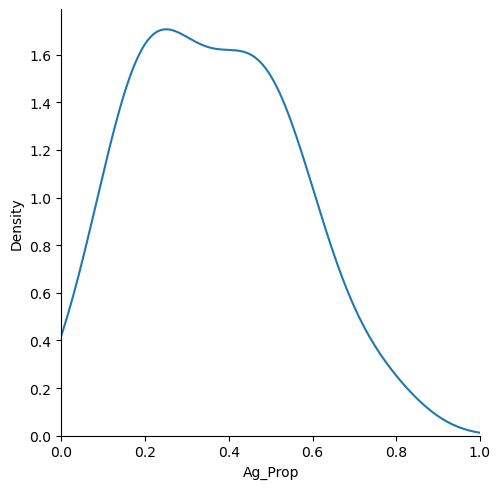

In [9]:
sns.displot(cdl_1km, x='Ag_Prop', kind='kde')
plt.xlim(0, 1)

(0.0, 1.0)

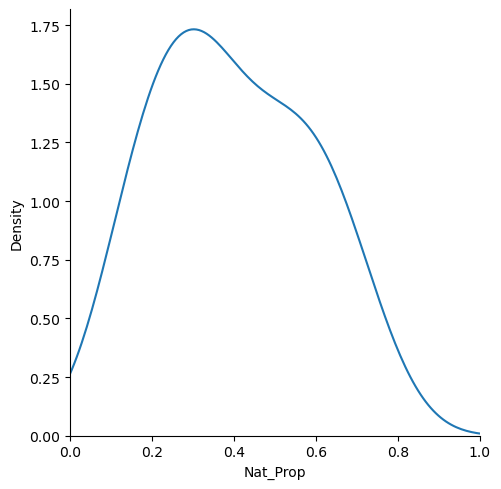

In [10]:
sns.displot(cdl_1km, x='Nat_Prop', kind='kde')
plt.xlim(0, 1)

(0.0, 1.0)

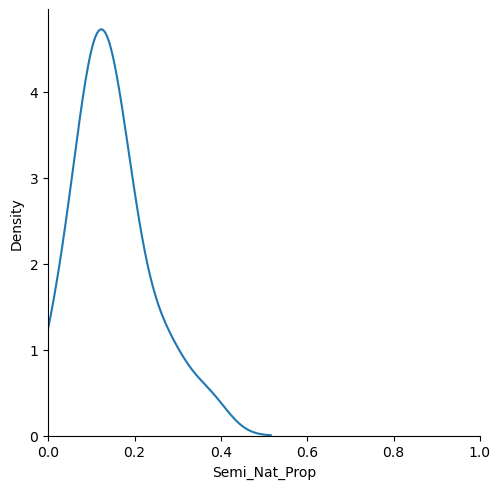

In [11]:
sns.displot(cdl_1km, x='Semi_Nat_Prop', kind='kde')
plt.xlim(0, 1)

(0.0, 1.0)

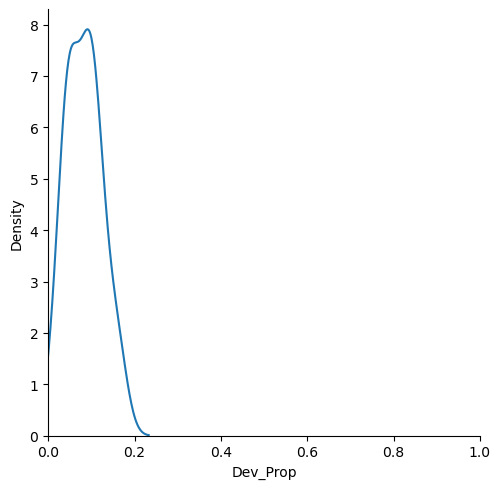

In [12]:
sns.displot(cdl_1km, x='Dev_Prop', kind='kde')
plt.xlim(0, 1)

(0.0, 1.0)

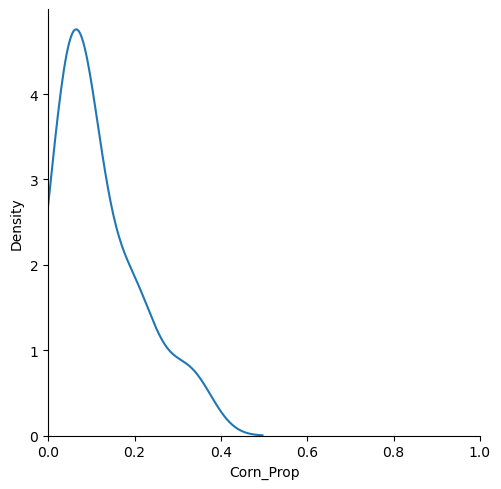

In [13]:
sns.displot(cdl_1km, x='Corn_Prop', kind='kde')
plt.xlim(0, 1)

(0.0, 1.0)

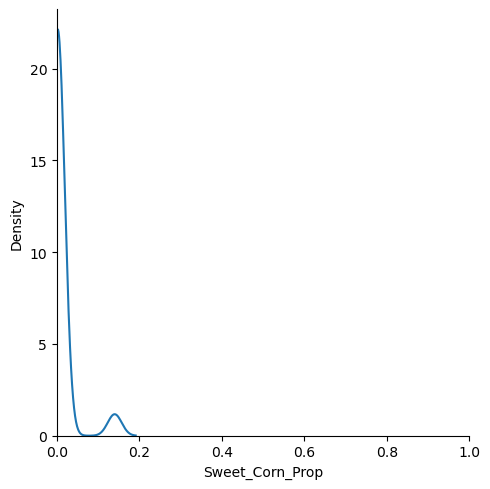

In [14]:
sns.displot(cdl_1km, x='Sweet_Corn_Prop', kind='kde')
plt.xlim(0, 1)

(0.0, 1.0)

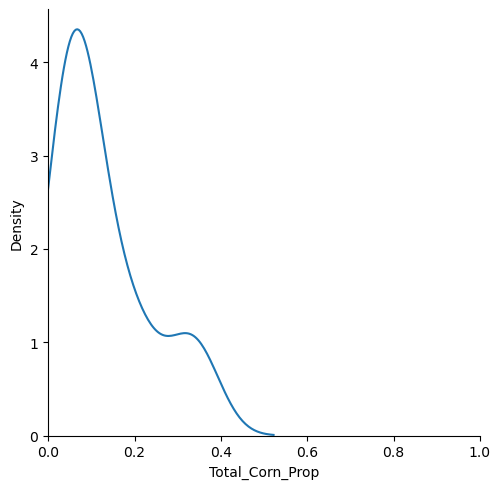

In [15]:
sns.displot(cdl_1km, x='Total_Corn_Prop', kind='kde')
plt.xlim(0, 1)

In [34]:
metadata = pd.read_csv("../CDL_Metadata_NY_2022.csv")
qgis_df_5km = pd.read_csv(
    "2023_5km_cdl_output.csv"
)

In [35]:
cdl_5km = cdl_processing(metadata, qgis_df_5km)
cdl_5km

,Name,Corn,Sorghum,Soybeans,Sunflower,Sweet Corn,Barley,Spring Wheat,Winter Wheat,Dbl Crop WinWht/Soybeans,...,Ag,Ag_Prop,Nat,Nat_Prop,Semi_Nat,Semi_Nat_Prop,Dev,Dev_Prop,Other,Other_Prop
0,HAT,4096,2,7859,0,14,4,7,949,0,...,20384,0.235327,47528,0.548695,12280,0.141769,6384,0.073701,0.0,0.0
1,MUS,18623,2,5358,6,853,2,1,911,0,...,45078,0.520333,17011,0.196357,8878,0.102478,5312,0.061316,0.0,0.0
2,REM,12434,81,6961,0,41,1,12,2594,0,...,34042,0.392977,22280,0.257198,21546,0.248724,8602,0.099300,0.0,0.0
3,SS,8021,15,5002,0,38,8,207,921,0,...,21503,0.248239,25792,0.297753,18417,0.212613,7034,0.081203,0.0,0.0
4,MAN,1005,0,442,0,15,0,0,6,0,...,2963,0.034212,71381,0.824204,6984,0.080641,4689,0.054142,0.0,0.0
5,CURC,5250,6,625,0,4,1,0,43,0,...,12004,0.138594,57232,0.660778,12536,0.144736,4269,0.049288,0.0,0.0
6,FREE,7208,12,829,0,42,2,4,134,0,...,22372,0.258310,34233,0.395259,19872,0.229445,10240,0.118233,0.0,0.0
7,FISH,13382,1,8488,0,23,1,1,1532,0,...,31582,0.364381,31661,0.365293,13834,0.159611,9289,0.107173,0.0,0.0
8,RUSH,16583,4,10825,0,608,0,0,354,0,...,40707,0.469267,31790,0.366472,6790,0.078275,5087,0.058642,0.0,0.0
9,AG,9341,7,1964,0,85,0,0,87,0,...,21472,0.247362,39915,0.459829,12712,0.146445,12061,0.138945,0.0,0.0


In [36]:
cdl_5km['Corn_Prop'] = cdl_5km['Corn'] / cdl_5km['Total']
cdl_5km['Sweet_Corn_Prop'] = cdl_5km['Sweet Corn'] / cdl_5km['Total']
cdl_5km['Total_Corn_Prop'] = (cdl_5km['Corn'] + cdl_5km['Sweet Corn']) / cdl_5km['Total']

cdl_5km

,Name,Corn,Sorghum,Soybeans,Sunflower,Sweet Corn,Barley,Spring Wheat,Winter Wheat,Dbl Crop WinWht/Soybeans,...,Nat_Prop,Semi_Nat,Semi_Nat_Prop,Dev,Dev_Prop,Other,Other_Prop,Corn_Prop,Sweet_Corn_Prop,Total_Corn_Prop
0,HAT,4096,2,7859,0,14,4,7,949,0,...,0.548695,12280,0.141769,6384,0.073701,0.0,0.0,0.047287,0.000162,0.047449
1,MUS,18623,2,5358,6,853,2,1,911,0,...,0.196357,8878,0.102478,5312,0.061316,0.0,0.0,0.214964,0.009846,0.224810
2,REM,12434,81,6961,0,41,1,12,2594,0,...,0.257198,21546,0.248724,8602,0.099300,0.0,0.0,0.143537,0.000473,0.144010
3,SS,8021,15,5002,0,38,8,207,921,0,...,0.297753,18417,0.212613,7034,0.081203,0.0,0.0,0.092598,0.000439,0.093036
4,MAN,1005,0,442,0,15,0,0,6,0,...,0.824204,6984,0.080641,4689,0.054142,0.0,0.0,0.011604,0.000173,0.011777
5,CURC,5250,6,625,0,4,1,0,43,0,...,0.660778,12536,0.144736,4269,0.049288,0.0,0.0,0.060614,0.000046,0.060661
6,FREE,7208,12,829,0,42,2,4,134,0,...,0.395259,19872,0.229445,10240,0.118233,0.0,0.0,0.083225,0.000485,0.083710
7,FISH,13382,1,8488,0,23,1,1,1532,0,...,0.365293,13834,0.159611,9289,0.107173,0.0,0.0,0.154396,0.000265,0.154662
8,RUSH,16583,4,10825,0,608,0,0,354,0,...,0.366472,6790,0.078275,5087,0.058642,0.0,0.0,0.191167,0.007009,0.198176
9,AG,9341,7,1964,0,85,0,0,87,0,...,0.459829,12712,0.146445,12061,0.138945,0.0,0.0,0.107610,0.000979,0.108589
